#Task 3: Customer Segmentation / Clustering

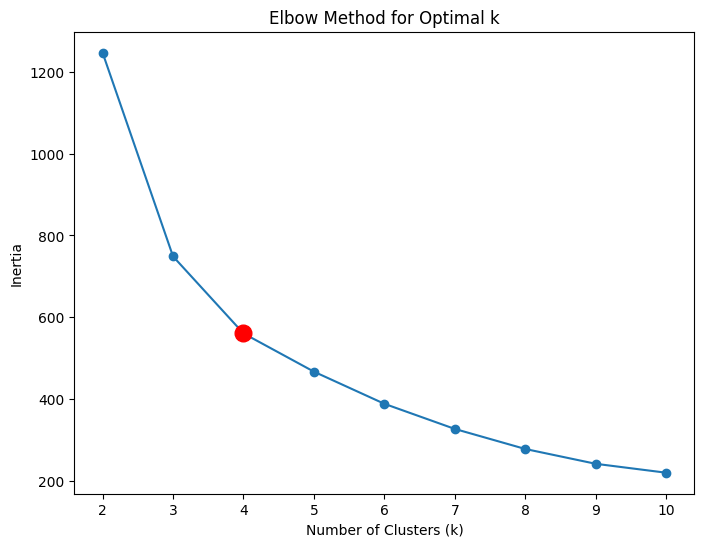

Number of clusters formed: 4
DB Index value: 0.8604623618059397
Silhouette Score: 0.40586308818713474
          TotalValue  PurchaseFrequency
Cluster                                
0         338.211955           4.603352
1        1247.018923           7.333333
2        1204.146911           4.068063
3         374.042695           8.308594


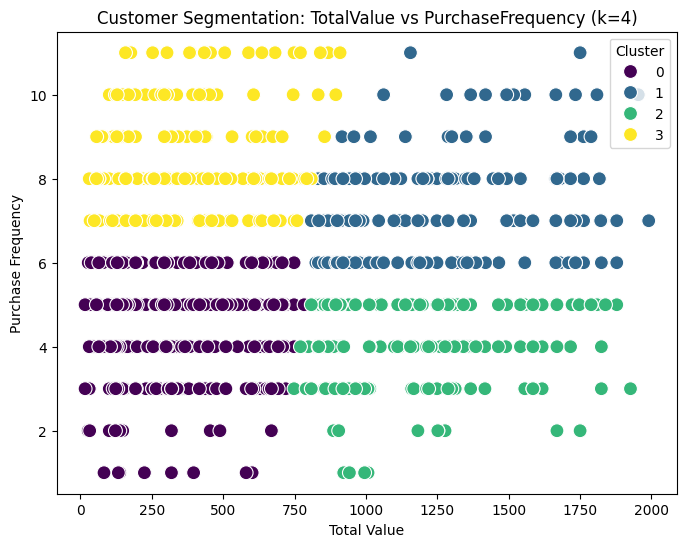

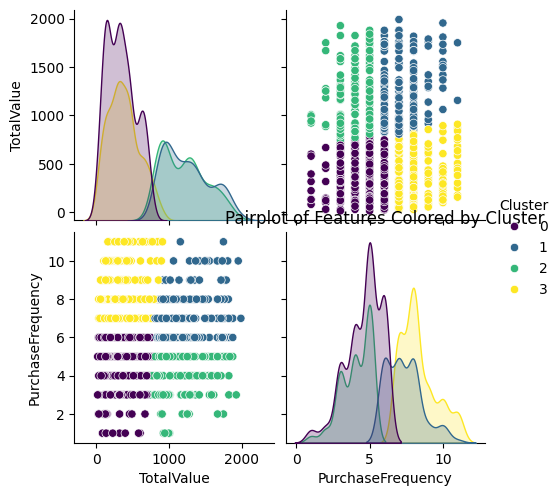

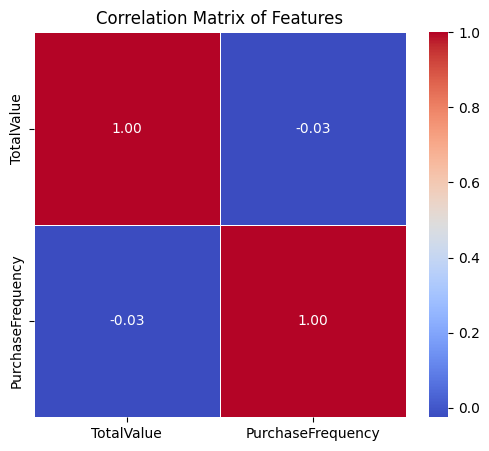

<ipython-input-7-020582899340>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PurchaseFrequency', data=customer_transactions, palette='Set2')


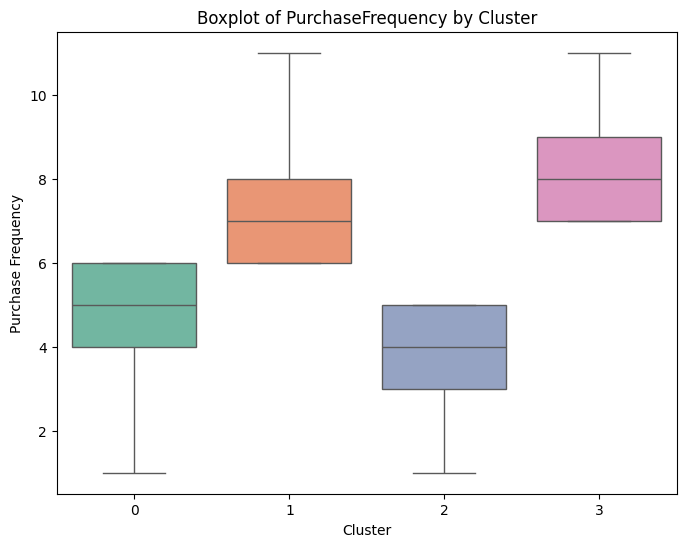

<ipython-input-7-020582899340>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalValue', data=customer_transactions, palette='Set2')


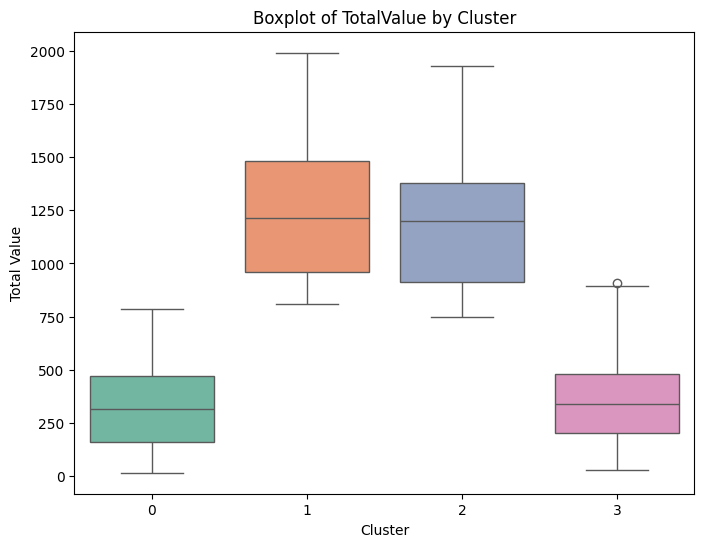

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

# Merge the dataframes
customer_transactions = pd.merge(transactions_df, customers_df, on='CustomerID')

# Feature engineering: Assuming 'PurchaseFrequency' needs to be calculated
customer_transactions['PurchaseFrequency'] = customer_transactions.groupby('CustomerID')['TransactionID'].transform('count')

# Select relevant features for clustering
features = ['TotalValue', 'PurchaseFrequency']
X = customer_transactions[features]

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method (between 2 and 10)
inertia = []
for i in range(2, 11):  # Check for 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=50, max_iter=300)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
# plt.figure(figsize=(8, 6))
# plt.plot(range(2, 11), inertia, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.show()
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.plot(k, inertia[k - 2], marker='o', markersize=12, color='red') # Highlight chosen k
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (you can adjust based on your plot)
k = 4

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50, max_iter=300)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
customer_transactions['Cluster'] = clusters

# Calculate clustering metrics
db_index = davies_bouldin_score(X_scaled, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

# Report on clustering results
print(f"Number of clusters formed: {k}")
print(f"DB Index value: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Cluster profiling: calculate the average of the features for each cluster
cluster_profiles = customer_transactions.groupby('Cluster')[features].mean()
print(cluster_profiles)

# Visualize the clusters

# 1. Scatter plot of TotalValue vs. PurchaseFrequency (colored by cluster)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalValue', y='PurchaseFrequency', hue='Cluster', data=customer_transactions, palette='viridis', s=100)
plt.title(f'Customer Segmentation: TotalValue vs PurchaseFrequency (k={k})')
plt.xlabel('Total Value')
plt.ylabel('Purchase Frequency')
plt.legend(title='Cluster')
plt.show()

# 2. Pairplot of TotalValue and PurchaseFrequency colored by Cluster
sns.pairplot(customer_transactions, hue='Cluster', vars=features, palette='viridis')
plt.title('Pairplot of Features Colored by Cluster')
plt.show()

# 3. Heatmap of the correlation matrix of features
correlation_matrix = customer_transactions[features].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 4. Box plot of PurchaseFrequency across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='PurchaseFrequency', data=customer_transactions, palette='Set2')
plt.title('Boxplot of PurchaseFrequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Frequency')
plt.show()

# 5. Box plot of TotalValue across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='TotalValue', data=customer_transactions, palette='Set2')
plt.title('Boxplot of TotalValue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Value')
plt.show()

# Optional: Save the clustered data to a CSV for further analysis
customer_transactions.to_csv('customer_transactions_with_clusters.csv', index=False)
